In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import geopandas as gpd
import descartes

from shapely.geometry import Point

In [38]:
dataset = pd.read_csv("zika_data/2016-03.csv")
places = pd.read_csv("zika_data/places.csv")
march_2016_data = pd.read_csv("data/precipitation_3_2016.csv")

In [39]:
final_df = pd.merge(dataset, places, how = 'inner', left_on = "location", right_on = "location")

In [42]:
final_df = final_df[["location", "value", "latitude", "longitude"]].groupby(["location", "latitude", "longitude"]).sum().reset_index()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


(-74.57737693511623,
 -52.592523502299095,
 -56.743037316433366,
 -20.11357157129934)

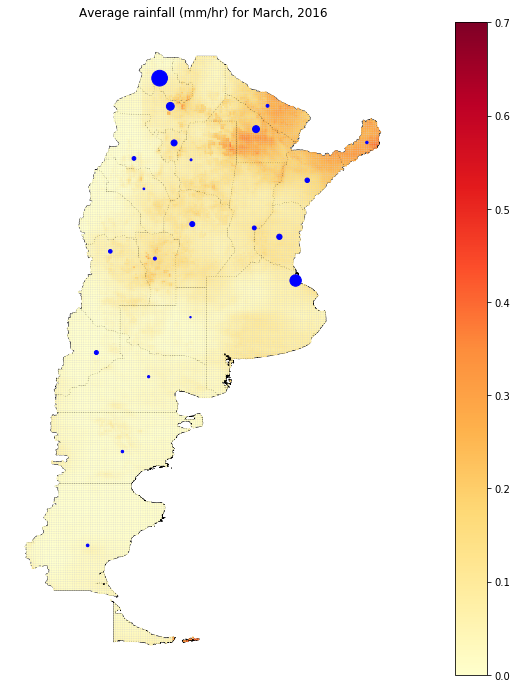

In [46]:
world = gpd.read_file("shapefiles/provinces/ARG_adm1.shp")

ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

points = [Point(xy) for xy in zip(march_2016_data["longitude"], march_2016_data["latitude"])]
geo_df = gpd.GeoDataFrame(march_2016_data, crs = {'init': 'epsg:4326'}, geometry = points)
geo_df.plot(column = 'precipitation', 
            markersize = 1, 
            ax = ax, 
            legend = True, 
            cmap = 'YlOrRd', 
            vmin = 0.0, 
            vmax = 0.7)

points2 = [Point(xy) for xy in zip(final_df["longitude"], final_df["latitude"])]
zika_df = gpd.GeoDataFrame(final_df, crs = {'init': 'epsg:4326'}, geometry = points2)
zika_df.plot(column = 'value', ax = ax, markersize = 'value', color = 'blue')
plt.title("Average rainfall (mm/hr) for March, 2016")

ax.axis('off')

In [47]:
dataset = pd.read_csv("zika_data/2017-03.csv")
march_2017_data = pd.read_csv("data/precipitation_3_2017.csv")

final_df = pd.merge(dataset, places, how = 'inner', left_on = "location", right_on = "location")
final_df = final_df[["location", "value", "latitude", "longitude"]].groupby(["location", "latitude", "longitude"]).sum().reset_index()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


(-74.57737693511623,
 -52.592523502299095,
 -56.743037316433366,
 -20.11357157129934)

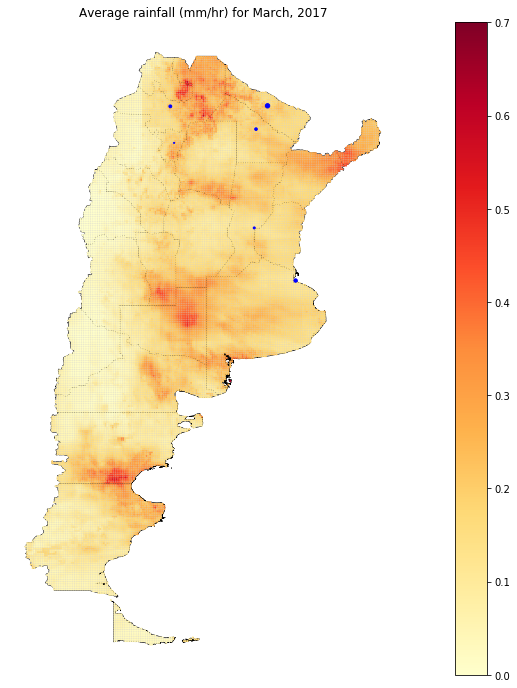

In [49]:
world = gpd.read_file("shapefiles/provinces/ARG_adm1.shp")

ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

points = [Point(xy) for xy in zip(march_2017_data["longitude"], march_2017_data["latitude"])]
geo_df = gpd.GeoDataFrame(march_2017_data, crs = {'init': 'epsg:4326'}, geometry = points)
geo_df.plot(column = 'precipitation', 
            markersize = 1, 
            ax = ax, 
            legend = True, 
            cmap = 'YlOrRd', 
            vmin = 0.0, 
            vmax = 0.7)

points2 = [Point(xy) for xy in zip(final_df["longitude"], final_df["latitude"])]
zika_df = gpd.GeoDataFrame(final_df, crs = {'init': 'epsg:4326'}, geometry = points2)
zika_df.plot(column = 'value', ax = ax, markersize = 'value', color = 'blue')
plt.title("Average rainfall (mm/hr) for March, 2017")

ax.axis('off')

In [81]:
places = pd.read_csv("zika_data/places.csv")
dataset = pd.read_csv("zika_data/2016-03.csv")
final_df = dataset[["location", "value"]].groupby("location").sum().reset_index()
final_df["month"] = "03"
for month in ['04', '05', '06', '07', '08', '09', '10', '11', '12']:
    dataset = pd.read_csv("zika_data/2016-" + month + ".csv")
    temp_df = dataset[["location", "value"]].groupby("location").sum().reset_index()
    temp_df["month"] = month
    final_df = final_df.append(temp_df)

In [85]:
final_df = final_df.reset_index(drop = True)

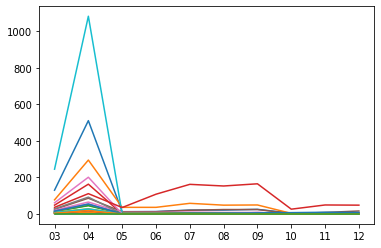

In [99]:
for province in final_df["location"].unique():
    temp_df = final_df[final_df["location"] == province].reset_index(drop = True)
    plt.plot(temp_df["month"], temp_df["value"])

In [114]:
dataset = pd.read_csv("zika_data/2016-08.csv")
april_2016_data = pd.read_csv("data/precipitation_4_2016.csv")

final_df = pd.merge(dataset, places, how = 'inner', left_on = "location", right_on = "location")
final_df = final_df[["location", "value", "latitude", "longitude"]].groupby(["location", "latitude", "longitude"]).sum().reset_index()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


(-74.57737693511623,
 -52.592523502299095,
 -56.743037316433366,
 -20.11357157129934)

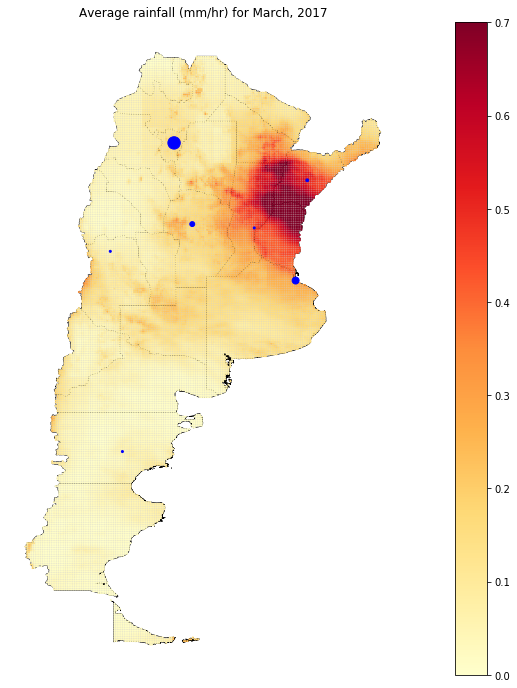

In [115]:
world = gpd.read_file("shapefiles/provinces/ARG_adm1.shp")

ax = world.plot(color = 'lightgrey', linewidth = 0.5, edgecolor = 'black', figsize = (20, 12))

points = [Point(xy) for xy in zip(april_2016_data["longitude"], april_2016_data["latitude"])]
geo_df = gpd.GeoDataFrame(april_2016_data, crs = {'init': 'epsg:4326'}, geometry = points)
geo_df.plot(column = 'precipitation', 
            markersize = 1, 
            ax = ax, 
            legend = True, 
            cmap = 'YlOrRd', 
            vmin = 0.0, 
            vmax = 0.7)

points2 = [Point(xy) for xy in zip(final_df["longitude"], final_df["latitude"])]
zika_df = gpd.GeoDataFrame(final_df, crs = {'init': 'epsg:4326'}, geometry = points2)
zika_df.plot(column = 'value', ax = ax, markersize = 'value', color = 'blue')
plt.title("Average rainfall (mm/hr) for March, 2017")

ax.axis('off')